# Stock Price Prediction Using RNN Algorithm

From the google stock prices before 2017 that are taken as an input to predict the future stock prices of its market.

In the following case the opening prices of 20 days in 2017 are predicted using RNN and LSTM algorithms .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train=data["Open"]

In [10]:
train=pd.DataFrame(train)

In [15]:
train.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [16]:
train.shape

(1258, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)

In [17]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [21]:
regressor=Sequential()

In [23]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


In [25]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)           

In [26]:
regressor.compile(optimizer='adam',loss="mean_squared_error")

In [27]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0393
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0077
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0064
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0061
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0052
Epoch 9/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 53s 44ms/step - loss: 0.0052
Epoch 11/100
1198/1198 [==============================] - 46s 38ms/step - loss: 0.0051
Epoch 12/100
1198/1198 [==============================]

In [31]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)
test_set.shape

(20, 1)

In [37]:
test_set.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [33]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(80,)

In [34]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [38]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)

In [39]:
predicted_stock_price

,0
0,784.164978
1,781.228333
2,784.137878
3,786.287292
4,789.736084
5,796.130676
6,799.570251
7,797.835022
8,796.579285
9,797.140869


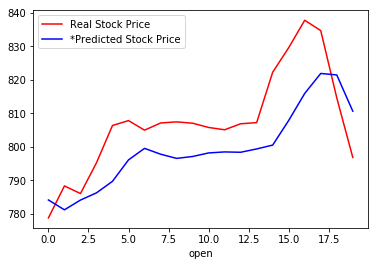

In [44]:
plt.plot(test_set,color='red',label="Real Stock Price")
plt.plot(predicted_stock_price,color='blue',label="*Predicted Stock Price")
plt.xlabel("day")
plt.xlabel("open")
plt.legend()
plt.show()